In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('Clean_Referral.xlsx')
data.describe().T

,count,mean,std,min,25%,50%,75%,max
referral_id,499.0,250.000000,144.193157,1.00,125.50,250.00,374.500,499.00
referral_age,499.0,27.020040,2.811979,20.00,25.00,27.00,29.000,65.00
referral_exp_in_years,499.0,4.053307,2.609814,1.00,2.00,4.00,6.000,42.00
referral_current_salary,499.0,86.472946,52.566584,25.00,45.00,85.00,126.000,853.00
referral_10_th_marks,499.0,77.453497,10.547603,60.00,68.00,78.00,87.000,103.00
referral_12th_marks,499.0,77.478958,10.932113,12.00,69.00,77.00,87.000,95.00
referral_graduation_marks,499.0,77.262525,10.219735,60.00,68.00,77.00,86.000,104.00
referral_post_grad_marks,499.0,78.268537,10.467968,60.00,69.00,78.00,88.500,101.00
referral_expected_sal,499.0,108.669339,58.605352,40.00,62.00,103.00,143.000,870.00
referral_aptitude_numerical_score,499.0,20.971363,12.507253,0.43,10.00,20.43,31.955,43.48


In [3]:
data.drop(['referral_id'], axis=1, inplace=True)

In [4]:
num = []
cat = []
for i in data.columns:
    if data[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)
num

['referral_age',
 'referral_exp_in_years',
 'referral_current_salary',
 'referral_10_th_marks',
 'referral_12th_marks',
 'referral_graduation_marks',
 'referral_post_grad_marks',
 'referral_expected_sal',
 'referral_aptitude_numerical_score',
 'referral_aptitude_verbal_score',
 'referral_aptitude_reasoning_score',
 'referral_Management_Interview_score',
 'referral_HR_Interview_score',
 'Salary offered']

Scaling
1.) Z-Score

In [5]:
from scipy.stats import zscore
data_scaled = data[num].apply(zscore)
data_scaled.head()    

,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered
0,0.348844,0.363108,0.371846,1.095802,-0.501683,0.953767,0.452448,0.244774,-0.878080,0.917867,-0.016947,1.462710,-0.482494,0.741797
1,-0.363112,-0.404000,-0.408900,-1.371686,-0.043856,1.639404,0.643699,-0.438443,-1.191013,0.454815,-0.212046,1.462710,0.791391,-0.418628
2,-1.431047,-0.787553,-0.789752,1.380513,0.688667,0.659923,-0.599431,-0.797132,1.662194,-1.576054,1.217930,-1.279957,-0.846461,-0.799095
3,0.704823,0.746661,0.752697,-1.656396,1.604322,1.737352,-1.077558,0.637623,0.826641,-1.041701,-0.016947,1.119877,-0.482494,0.760820
4,-0.363112,-0.404000,-0.408900,1.380513,-0.684814,0.268130,1.313077,-0.438443,0.374449,0.703962,-0.537210,0.434210,-0.300510,-0.247418


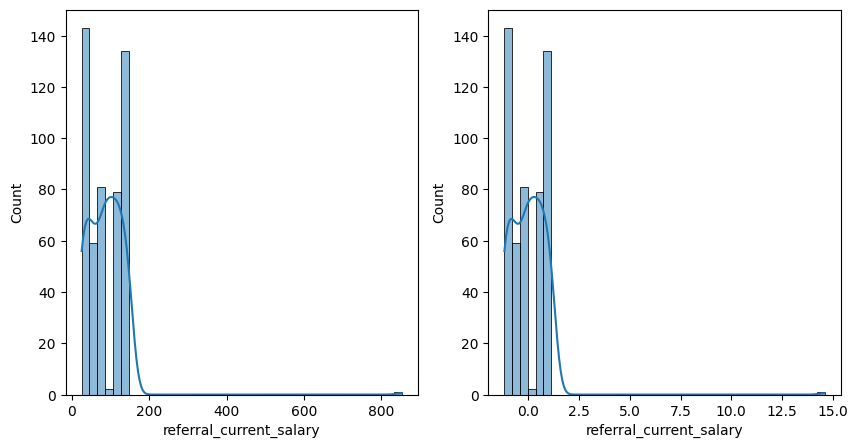

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10,5)
sns.histplot(data['referral_current_salary'], kde=True, ax = axes[0])
sns.histplot(data_scaled['referral_current_salary'], kde=True, ax = axes[1])

plt.show()

Another way -- Using StandardScaler for Standardization

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(data[num])
data_standard = scaler.transform(data[num])
data_standard = pd.DataFrame(data_standard, columns=data[num].columns)
data_standard.head()

,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered
0,0.348844,0.363108,0.371846,1.095802,-0.501683,0.953767,0.452448,0.244774,-0.878080,0.917867,-0.016947,1.462710,-0.482494,0.741797
1,-0.363112,-0.404000,-0.408900,-1.371686,-0.043856,1.639404,0.643699,-0.438443,-1.191013,0.454815,-0.212046,1.462710,0.791391,-0.418628
2,-1.431047,-0.787553,-0.789752,1.380513,0.688667,0.659923,-0.599431,-0.797132,1.662194,-1.576054,1.217930,-1.279957,-0.846461,-0.799095
3,0.704823,0.746661,0.752697,-1.656396,1.604322,1.737352,-1.077558,0.637623,0.826641,-1.041701,-0.016947,1.119877,-0.482494,0.760820
4,-0.363112,-0.404000,-0.408900,1.380513,-0.684814,0.268130,1.313077,-0.438443,0.374449,0.703962,-0.537210,0.434210,-0.300510,-0.247418


2.) Min-Max

In [8]:
from sklearn.preprocessing import MinMaxScaler
# building the scaler model
scaler = MinMaxScaler().fit(data[num])
# transform the test data
data_minmax = scaler.transform(data[num])
data_minmax = pd.DataFrame(data_minmax, columns=data[num].columns)
data_minmax.head()
data_minmax.describe()

,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,0.156001,0.074471,0.074243,0.405895,0.788903,0.392330,0.445574,0.082734,0.477151,0.497340,0.264467,0.525941,0.042285,0.074886
std,0.062488,0.063654,0.063486,0.245293,0.131712,0.232267,0.255316,0.070609,0.290529,0.283715,0.150854,0.324422,0.050005,0.063550
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.024390,0.024155,0.186047,0.686747,0.181818,0.219512,0.026506,0.222300,0.262718,0.144306,0.222222,0.018182,0.024155
50%,0.155556,0.073171,0.072464,0.418605,0.783133,0.386364,0.439024,0.075904,0.464576,0.495006,0.261913,0.555556,0.036364,0.073671
75%,0.200000,0.121951,0.121981,0.627907,0.903614,0.590909,0.695122,0.124096,0.732288,0.747503,0.384364,0.777778,0.063636,0.121981
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Transformation

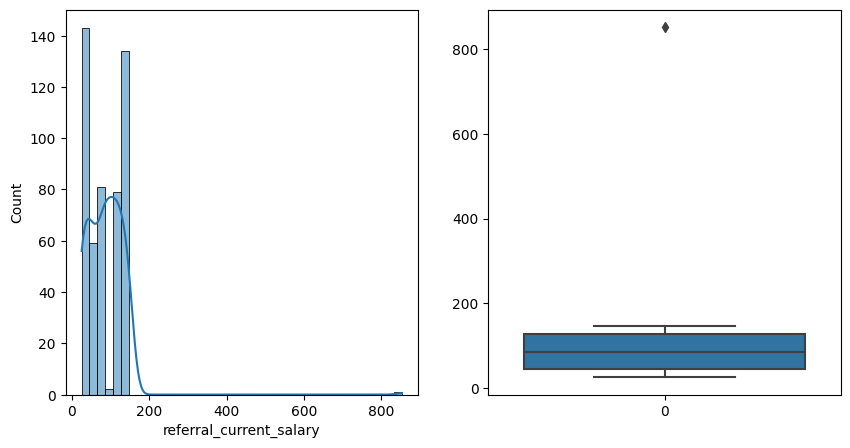

In [9]:
data['referral_current_salary'].describe()

fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(data['referral_current_salary'], kde=True, ax=axes[0])
sns.boxplot(data['referral_current_salary'], ax = axes[1])

plt.show()

In [10]:
data['referral_current_salary'].skew()

6.184346309755603

In [11]:
data['referral_current_salary'].kurtosis()

89.46603642396403

Currently this field is positively skewed and has high peakedness. Let's apply some tranformation techniques to change them.

In [ ]:
#from sklearn.preprocessing import FunctionTransformer

#log_transform = FunctionTransformer(np.log1p)
#df['log_medical_cost'] = log_transform.fit_transform(df[['medical_cost']])

#inverse_log_transformer = FunctionTransformer(np.expm1)
#df['original_medical_cost'] = inverse_log_transformer.fit_transform(df[['log_medical_cost']])

1.) Log Tranformation

-0.5366972326623899
-0.25722521778402907


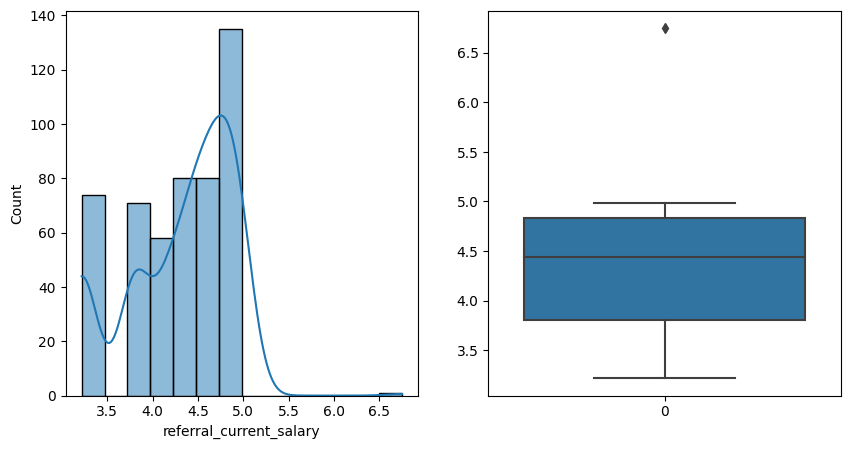

In [12]:
print(np.log(data['referral_current_salary']).skew())
print((np.log(data['referral_current_salary']).kurtosis()))

fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(np.log(data['referral_current_salary']), kde=True, ax=axes[0])
sns.boxplot(np.log(data['referral_current_salary']), ax = axes[1])

plt.show()

# Values got nearer, hence affecting kurtosis and skewness

2.) sqrt Tranformation 

0.7524793474615112
7.32123129002615


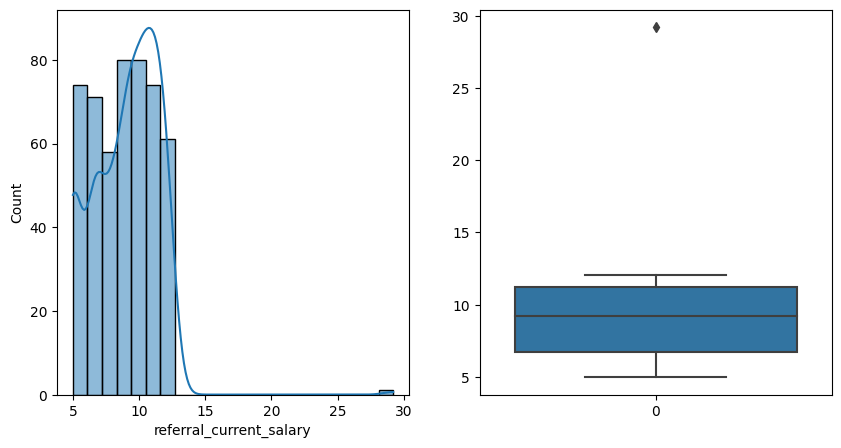

In [13]:
print(np.sqrt(data['referral_current_salary']).skew())
print((np.sqrt(data['referral_current_salary']).kurtosis()))

fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(np.sqrt(data['referral_current_salary']), kde=True, ax=axes[0])
sns.boxplot(np.sqrt(data['referral_current_salary']), ax = axes[1])

plt.show()

3.) 10th root Transformation

-0.3950105143684113
0.04120887026425146


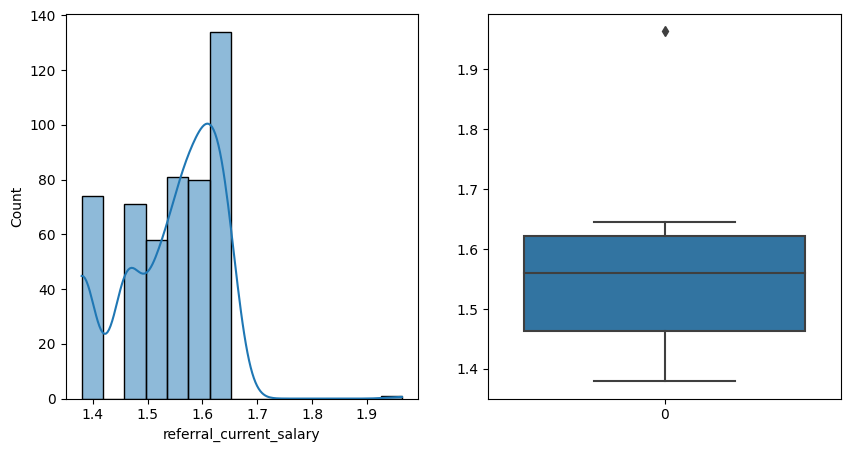

In [14]:
print((data['referral_current_salary']**0.1).skew())
print((data['referral_current_salary']**0.1).kurtosis())

fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot((data['referral_current_salary']**0.1), kde=True, ax=axes[0])
sns.boxplot((data['referral_current_salary']**0.1), ax = axes[1])

plt.show()

# Went into negative skewness but Kurtosis has improved 

Outlier Treatment

1.) Using Z-score method 

In [15]:
data['referral_current_salary'].describe().T

count    499.000000
mean      86.472946
std       52.566584
min       25.000000
25%       45.000000
50%       85.000000
75%      126.000000
max      853.000000
Name: referral_current_salary, dtype: float64

In [16]:
data['exp'] = data['referral_current_salary']  # Using data[exp] without disturbing original data under the field
data['exp1'] = data['referral_current_salary'] 
data['exp_zscore'] = (data['exp'] - data['exp'].mean())/data['exp'].std()
data['exp_zscore'].describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   referral_age                         499 non-null    int64  
 1   referral_exp_in_years                499 non-null    float64
 2   referral_current_salary              499 non-null    int64  
 3   referral_10_th_marks                 499 non-null    float64
 4   referral_12th_marks                  499 non-null    int64  
 5   referral_graduation_marks            499 non-null    int64  
 6   referral_post_grad_marks             499 non-null    int64  
 7   referral_expected_sal                499 non-null    int64  
 8   referral_aptitude_numerical_score    499 non-null    float64
 9   referral_aptitude_verbal_score       499 non-null    float64
 10  referral_aptitude_reasoning_score    499 non-null    float64
 11  referral_Management_Interview_sc

In [17]:
data[data['exp_zscore'] > 3]

,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,...,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,referral_preferred_city,referral_gender,Emp_Salary_Grade,Joined,exp,exp1,exp_zscore
354,65,42.0,853,61.0,95,78,68,870,2.17,33.48,...,7,3,868,Mumbai,Male,EL0,No,853,853,14.582021


Z score higher than 3 is considered outlier. We'll replace this with the value for which z-score is equal to 3. That would be (3*std + mean)

In [18]:
imputer = 3*(data['exp'].std()) + data['exp'].mean()
imputer 

244.17269786667885

In [19]:
data['exp'].describe()
data['exp'].replace(853.000000,imputer,inplace=True)
data['exp'].describe()

count    499.000000
mean      85.252851
std       40.396107
min       25.000000
25%       45.000000
50%       85.000000
75%      126.000000
max      244.172698
Name: exp, dtype: float64

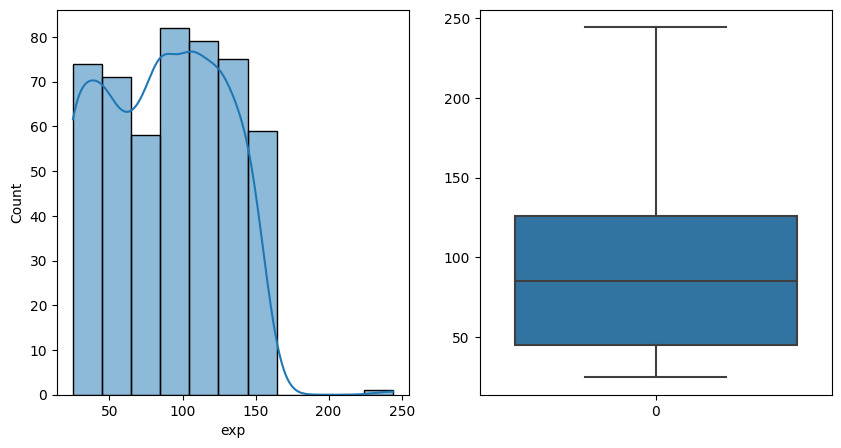

In [20]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(data['exp'], kde=True, ax=axes[0])
sns.boxplot(data['exp'], ax = axes[1])

plt.show()

In [21]:
data.drop(['exp_zscore'], axis=1, inplace=True)

2.) Boxplot Method

In [22]:
data['exp1'].describe()

count    499.000000
mean      86.472946
std       52.566584
min       25.000000
25%       45.000000
50%       85.000000
75%      126.000000
max      853.000000
Name: exp1, dtype: float64

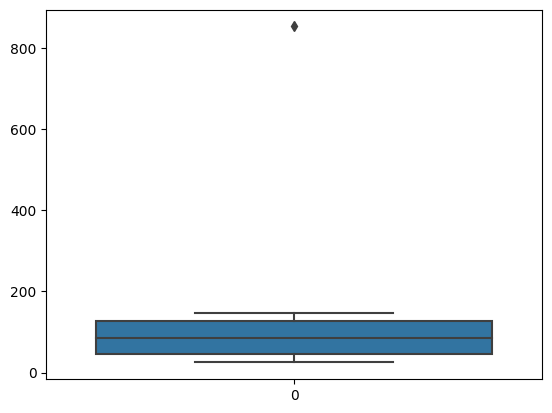

In [23]:
sns.boxplot(data['exp1'])
plt.show()

In [24]:
def detect_outlier(col):
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3-Q1
    lower_whisker = Q1-(1.5*IQR)
    upper_whisker = Q3+(1.5*IQR)
    return lower_whisker,upper_whisker

lr,ur = detect_outlier(data['exp1'])

In [25]:
data['exp1'] = np.where(data['exp1']>ur,ur,data['exp1'])
data['exp1'] = np.where(data['exp1']<lr,lr,data['exp1'])

data['exp1'].describe()

count    499.000000
mean      85.259519
std       40.422658
min       25.000000
25%       45.000000
50%       85.000000
75%      126.000000
max      247.500000
Name: exp1, dtype: float64

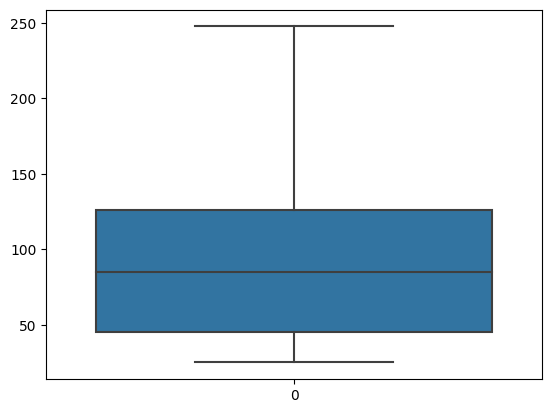

In [26]:
sns.boxplot(data['exp1'])
plt.show()

3.) We can also remove the specific row with the domain knowledge or specific insights about the data

In [27]:
data[data['referral_current_salary'] == 853.000000]

,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,referral_preferred_city,referral_gender,Emp_Salary_Grade,Joined,exp,exp1
354,65,42.0,853,61.0,95,78,68,870,2.17,33.48,29.13,7,3,868,Mumbai,Male,EL0,No,244.172698,247.5


In [28]:
data.drop(354, axis=0, inplace=True)

In [29]:
data.shape

(498, 20)

In [30]:
data.reset_index(drop=True, inplace=True)
data.tail()

# Whenever row is dropped, reset the indices. 498 rows in shape means final row index is 497, which is corrected after resetting

,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,referral_preferred_city,referral_gender,Emp_Salary_Grade,Joined,exp,exp1
493,21,1.0,25,81.0,77,77,91,42,19.13,16.09,6.52,9,8,40,Pune,Male,EL0,Yes,25.0,25.0
494,21,1.0,25,74.0,95,67,81,100,3.48,13.04,29.13,9,3,40,Mumbai,Female,EL0,Yes,25.0,25.0
495,29,7.0,146,94.0,92,89,71,200,38.70,5.22,39.57,9,5,161,Mumbai,Male,EL0,Yes,146.0,146.0
496,30,7.0,143,64.0,89,61,88,160,38.70,37.83,6.52,7,5,158,Mumbai,Female,EL0,Yes,143.0,143.0
497,30,8.0,144,67.0,72,81,60,200,33.48,20.43,1.74,4,6,159,Bangalore,Female,EE0,No,144.0,144.0


In [31]:
data.drop(['exp','exp1'], axis=1, inplace=True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   referral_age                         498 non-null    int64  
 1   referral_exp_in_years                498 non-null    float64
 2   referral_current_salary              498 non-null    int64  
 3   referral_10_th_marks                 498 non-null    float64
 4   referral_12th_marks                  498 non-null    int64  
 5   referral_graduation_marks            498 non-null    int64  
 6   referral_post_grad_marks             498 non-null    int64  
 7   referral_expected_sal                498 non-null    int64  
 8   referral_aptitude_numerical_score    498 non-null    float64
 9   referral_aptitude_verbal_score       498 non-null    float64
 10  referral_aptitude_reasoning_score    498 non-null    float64
 11  referral_Management_Interview_sc

Encoding

1.) Label Encoding

In [33]:
data[cat]

,referral_preferred_city,referral_gender,Emp_Salary_Grade,Joined
0,Delhi,Male,EL0,Yes
1,Pune,Male,ML0,Yes
2,Mumbai,Male,EL0,No
3,Bangalore,Male,ML0,Yes
4,Mumbai,Female,EL0,Yes
...,...,...,...,...
493,Pune,Male,EL0,Yes
494,Mumbai,Female,EL0,Yes
495,Mumbai,Male,EL0,Yes
496,Mumbai,Female,EL0,Yes


In [34]:
data['referral_preferred_city'] = data['referral_preferred_city'].astype('category')
data.dtypes

referral_age                              int64
referral_exp_in_years                   float64
referral_current_salary                   int64
referral_10_th_marks                    float64
referral_12th_marks                       int64
referral_graduation_marks                 int64
referral_post_grad_marks                  int64
referral_expected_sal                     int64
referral_aptitude_numerical_score       float64
referral_aptitude_verbal_score          float64
referral_aptitude_reasoning_score       float64
referral_Management_Interview_score       int64
referral_HR_Interview_score               int64
Salary offered                            int64
referral_preferred_city                category
referral_gender                          object
Emp_Salary_Grade                         object
Joined                                   object
dtype: object

In [35]:
data['referral_preferred_city'].value_counts()

referral_preferred_city
Mumbai       231
Bangalore    142
Delhi         93
Pune          32
Name: count, dtype: int64

In [36]:
data['referral_preferred_city'] = data['referral_preferred_city'].cat.codes
data.head()

,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,referral_preferred_city,referral_gender,Emp_Salary_Grade,Joined
0,28,5.0,106,89.0,72,87,83,123,10.00,33.04,23.48,10,3,141,1,Male,EL0,Yes
1,26,3.0,65,63.0,77,94,85,83,6.09,27.39,20.87,10,10,80,3,Male,ML0,Yes
2,23,2.0,45,92.0,85,84,72,62,41.74,2.61,40.00,2,1,60,2,Male,EL0,No
3,29,6.0,126,60.0,95,95,67,146,31.30,9.13,23.48,9,3,142,0,Male,ML0,Yes
4,26,3.0,65,92.0,70,80,92,83,25.65,30.43,16.52,7,4,89,2,Female,EL0,Yes


In [37]:
data['referral_preferred_city'].value_counts()

referral_preferred_city
2    231
0    142
1     93
3     32
Name: count, dtype: int64

2.) One Hot Encoding

In [38]:
cat.remove('Joined')
cat.remove('referral_preferred_city')
cat

['referral_gender', 'Emp_Salary_Grade']

In [39]:
data_new = pd.get_dummies(data, columns=cat, drop_first=True)

In [40]:
data_new.head()

,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,referral_preferred_city,Joined,referral_gender_Male,Emp_Salary_Grade_EL0,Emp_Salary_Grade_ML0
0,28,5.0,106,89.0,72,87,83,123,10.00,33.04,23.48,10,3,141,1,Yes,True,True,False
1,26,3.0,65,63.0,77,94,85,83,6.09,27.39,20.87,10,10,80,3,Yes,True,False,True
2,23,2.0,45,92.0,85,84,72,62,41.74,2.61,40.00,2,1,60,2,No,True,True,False
3,29,6.0,126,60.0,95,95,67,146,31.30,9.13,23.48,9,3,142,0,Yes,True,False,True
4,26,3.0,65,92.0,70,80,92,83,25.65,30.43,16.52,7,4,89,2,Yes,False,True,False


In [41]:
data_new['Joined'].value_counts()

Joined
No     260
Yes    238
Name: count, dtype: int64

In [48]:
data_new['Joined'] = np.where(data_new['Joined']=='Yes',1,0)

In [49]:
data_new['Joined'].value_counts()

Joined
0    260
1    238
Name: count, dtype: int64

In [50]:
data_new.head()

,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,referral_preferred_city,Joined,referral_gender_Male,Emp_Salary_Grade_EL0,Emp_Salary_Grade_ML0
0,28,5.0,106,89.0,72,87,83,123,10.00,33.04,23.48,10,3,141,1,1,True,True,False
1,26,3.0,65,63.0,77,94,85,83,6.09,27.39,20.87,10,10,80,3,1,True,False,True
2,23,2.0,45,92.0,85,84,72,62,41.74,2.61,40.00,2,1,60,2,0,True,True,False
3,29,6.0,126,60.0,95,95,67,146,31.30,9.13,23.48,9,3,142,0,1,True,False,True
4,26,3.0,65,92.0,70,80,92,83,25.65,30.43,16.52,7,4,89,2,1,False,True,False


In [51]:
data.shape

(498, 18)